# yahoo_finance 

This module allows basic access to Yahoo Finance data (stock prices, dividends and splits).

In [1]:
import yahoo_finance

## Basic Usage

You can download **stock quotes** with

In [2]:
quotes = yahoo_finance.download_quotes("GILD")
print quotes[0]
print quotes[-1]

{u'Volume': 168022400.0, u'Adj Close': 0.585014, u'High': 0.679688, u'Low': 0.539063, u'Date': datetime.datetime(1992, 1, 22, 0, 0), u'Close': 0.632813, u'Open': 0.539063}
{u'Volume': 11505700.0, u'Adj Close': 70.230003, u'High': 71.410004, u'Low': 69.910004, u'Date': datetime.datetime(2018, 6, 15, 0, 0), u'Close': 70.230003, u'Open': 71.099998}


By default this will download all the available price data (with a daily interval). However, you can **change the interval and the time range:**

In [3]:
import datetime

start = datetime.date(2014, 1, 1)
weekly_data = yahoo_finance.download_quotes("GILD", start_date=start, interval="1wk")

print quotes[0]
print quotes[-1]

{u'Volume': 168022400.0, u'Adj Close': 0.585014, u'High': 0.679688, u'Low': 0.539063, u'Date': datetime.datetime(1992, 1, 22, 0, 0), u'Close': 0.632813, u'Open': 0.539063}
{u'Volume': 11505700.0, u'Adj Close': 70.230003, u'High': 71.410004, u'Low': 69.910004, u'Date': datetime.datetime(2018, 6, 15, 0, 0), u'Close': 70.230003, u'Open': 71.099998}


You can also download the **dividends** with

In [4]:
dividends = yahoo_finance.download_dividends("GILD")
print dividends[0]
print dividends[-1]

{u'Date': datetime.datetime(2016, 9, 14, 0, 0), u'Dividends': 0.47}
{u'Date': datetime.datetime(2017, 3, 14, 0, 0), u'Dividends': 0.52}


You can specify a time range for the dividends, too, using <code>start_date</code> and <code>end_date</code>.

## Getting Ready-To-Use Return Vectors

This module also allow quick access to synchronized return vectors (often required for further data manipulation): 

In [10]:
universe = ["ADS.DE", "SAP.DE", "BAS.DE"]

# download price data
price_data = [yahoo_finance.download_quotes(symbol) for symbol in universe]

# synchronize price data
syncd = yahoo_finance.synchronize_price_data(price_data)

# calculate return vector
return_vector = yahoo_finance.get_synchronized_returns(syncd)

The output is a simple mXn list where m equals the number of stocks and n the number of returns.

If the resulting price data is much smaller than the original dataset a warning will be raised:

In [6]:
universe = ["SAP.DE", "UN01.DE", "BAS.DE"]

price_data = [yahoo_finance.download_quotes(symbol) for symbol in universe]
syncd = yahoo_finance.synchronize_price_data(price_data)

yahoo_finance.py:113: UserWarning: Coverage treshold hit: resulting coverage is 0.08% (0.92% data loss).
  % (coverage, 1 - coverage))


By default the coverage treshold is 90%.

## Usage Example

### Simple Charting

Text(0.5,1,'Stock price of GILD ranging from 1992-01-22 00:00:00 to 2018-06-15 00:00:00')

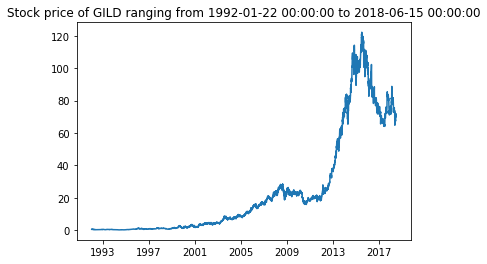

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

quotes = yahoo_finance.download_quotes("GILD")

start, end = quotes[0]["Date"], quotes[-1]["Date"]
plt.plot([day["Date"] for day in quotes], [day["Close"] for day in quotes])
plt.title("Stock price of GILD ranging from %s to %s in USD" % (start, end))


### Get Correlations of certain Stock Universe

In [11]:
import yahoo_finance
import numpy

universe = ["ADS.DE", "SAP.DE", "BAS.DE"]
price_data = [yahoo_finance.download_quotes(symbol) for symbol in universe]
syncd = yahoo_finance.synchronize_price_data(price_data)
return_vector = yahoo_finance.get_synchronized_returns(syncd)

print numpy.corrcoef(return_vector)

[[1.         0.06401106 0.44261776]
 [0.06401106 1.         0.07235774]
 [0.44261776 0.07235774 1.        ]]
